### Multiple Linear Regression

Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

Dataset Description:

The dataset consists of the following variables:

Age: Age in years

KM: Accumulated Kilometers on odometer

FuelType: Fuel Type (Petrol, Diesel, CNG)

HP: Horse Power

Automatic: Automatic ( (Yes=1, No=0)

CC: Cylinder Volume in cubic centimeters

Doors: Number of doors

Weight: Weight in Kilograms

Quarterly_Tax: 

Price: Offer Price in EUROs

Tasks:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

5.Apply Lasso and Ridge methods on the model.                       

#### 1.Exploratory Data Analysis (EDA) & Pre-processing

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("C:/Users/harik/Downloads/Multiple Linear Regression/ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [28]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [29]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [32]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

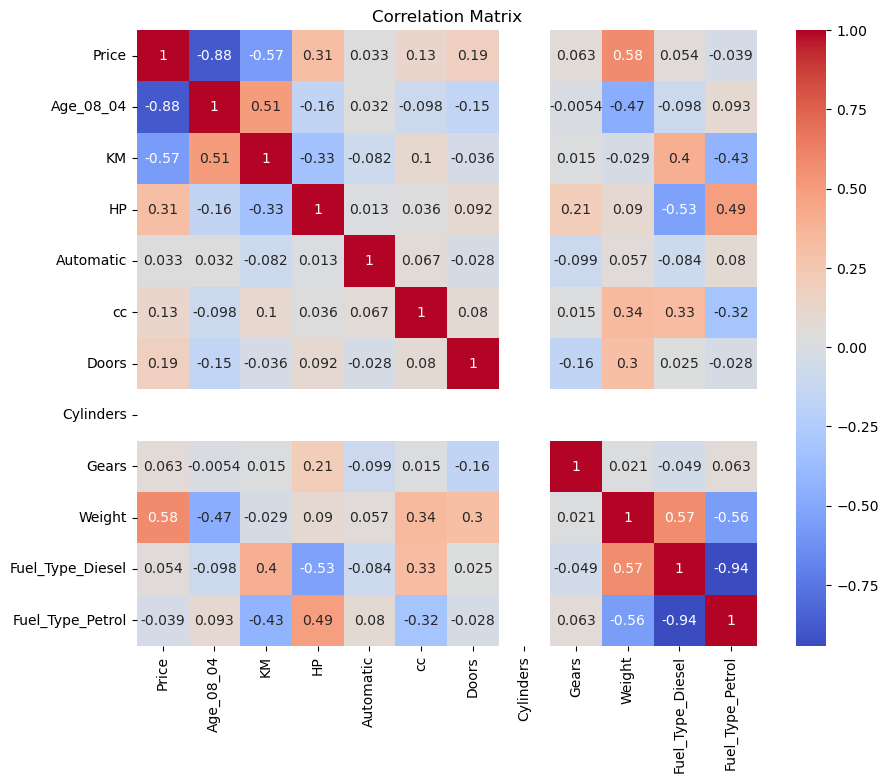

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### 2.Train–Test Split (80% – 20%)

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### 3.Multiple Linear Regression Models

In [40]:
#Model 1: Full Model (All Features)
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [41]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model1.coef_
})
coeff_df

,Feature,Coefficient
0,Age_08_04,-1.208305e+02
1,KM,-1.623141e-02
2,HP,1.403948e+01
3,Automatic,1.488309e+02
4,cc,-3.037219e-02
5,Doors,-6.031097e+01
6,Cylinders,-1.108447e-12
7,Gears,5.516007e+02
8,Weight,2.588496e+01
9,Fuel_Type_Diesel,-6.854876e+01


In [42]:
#Model 2: Reduced Model (Important Variables)
selected_features = ['Age_08_04', 'KM', 'HP', 'Weight', 'Automatic']
X2 = df[selected_features]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [43]:
#Model 3: Log-Transformed Price Model
y_log = np.log(df['Price'])

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression()

#### 4.Model Evaluation
Evaluation Metrics

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    return {
        "R2": r2_score(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds))
    }

In [46]:
# result
evaluate(model1, X_test, y_test)
evaluate(model2, X2_test, y2_test)
evaluate(model3, X3_test, y3_test)

{'R2': 0.8462841775415867, 'RMSE': 0.11553180908167879}

#### 5.Ridge and Lasso Regression
Ridge Regression

In [47]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

evaluate(ridge, X_test, y_test)

{'R2': 0.8351359377712344, 'RMSE': 1483.1541963778845}

##### Lasso Regression

In [48]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

evaluate(lasso, X_test, y_test)

{'R2': 0.8349467801804998, 'RMSE': 1484.004804582749}

##### Lasso Feature Selection

In [49]:
pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

,Feature,Coefficient
0,Age_08_04,-120.827216
1,KM,-0.016241
2,HP,14.091453
3,Automatic,147.287981
4,cc,-0.030575
5,Doors,-60.147193
6,Cylinders,0.000000
7,Gears,548.658386
8,Weight,25.868659
9,Fuel_Type_Diesel,-64.924880


#### Final Conclusion

Multiple Linear Regression effectively predicts Toyota Corolla prices

Age, KM, Weight, HP are the most influential variables

Ridge improves model stability

Lasso helps identify important features

The full MLR model provides the best prediction accuracy